Mean	 49.673675

 Biased Variance	 99.693624033375


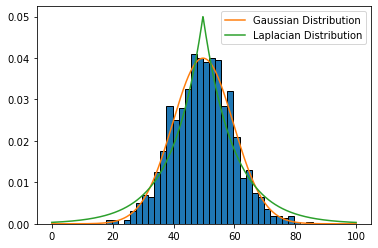

In [385]:
#Question 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
from scipy.stats import laplace

colnames=['X']
oneDfeatures=pd.read_table("http://www.cse.msu.edu/~rossarun/courses/sp22/cse802/data/hw02_data01.txt", header=None, names=colnames)
#Calculating the mean and the biased variance
meanD=st.mean(oneDfeatures["X"])
oneD_min=min(oneDfeatures['X'])
oneD_max=max(oneDfeatures['X'])
bins_list=np.arange(oneD_min, oneD_max, 2)
#Bin size is two generated values between min and max
plt.hist(oneDfeatures, bins=bins_list,density=True, edgecolor ="black")
a=(meanD-oneDfeatures["X"])**2
biasedVariance=np.mean(a)
print("Mean\t", meanD)
print("\n Biased Variance\t", biasedVariance)
newX=np.linspace(0, 100, 1000)
part1=1/(np.sqrt((2 *np.pi)**2 * biasedVariance))
part2=np.exp((-0.5)* (((newX-meanD)**2)/(2*biasedVariance)))
gaussian=norm.pdf(newX, meanD, np.sqrt(biasedVariance)) 
laplacian=laplace.pdf(newX, meanD, np.sqrt(biasedVariance))
plt.plot(newX, gaussian, label="Gaussian Distribution")
plt.plot(newX, laplacian, label="Laplacian Distribution")
plt.legend()


In [ ]:
#Question 1 part E

Explain which of the two parametric distributions better fit the data.

When we analyse the above graph, at the tail of the distribution laplace is spread more in such away it covers all the points.
Both the distribution have the same mean. But when we compared gaussian distribution it better fits the data.


In [ ]:
#Question 2, 3, 6, 7 is in the Handwritten report submitted along with this code

In [240]:
#Question-4 
#All the parts of the question is coded here.
#Question 4 part B is in the report

colnames=["X1", "X2", "X3", "X4", "Y"]
Iris_data=pd.read_table("http://www.cse.msu.edu/~rossarun/courses/sp22/cse802/data/iris_data.txt", header=None, names=colnames)
Iris_class1=np.array(Iris_data[Iris_data["Y"]==1])
Iris_class2=np.array(Iris_data[Iris_data["Y"]==2])
Iris_class3=np.array(Iris_data[Iris_data["Y"]==3])

#Class-1
mu1=np.mean(Iris_class1[0:24, 0:4], axis=0)
sigma1=np.cov(Iris_class1[0:24, 0:4], rowvar=0)
#Class-2
mu2=np.mean(Iris_class2[0:24, 0:4], axis=0)
sigma2=np.cov(Iris_class2[0:24, 0:4], rowvar=0)
#Class-3
mu3=np.mean(Iris_class3[0:24, 0:4], axis=0)
sigma3=np.cov(Iris_class3[0:24, 0:4], rowvar=0)

print("Mean of Setosa(class 1) \t", mu1)
print("\n Mean of Versicolor (class 2) \t", mu2)
print("\n Mean of Virginica (class 3) \t", mu3)
print("\n Covariance  of Setosa(class 1) \n", sigma1)
print("\n Covariance of Versicolor (class 2) \n", sigma2)
print("\n Covariance  of Virginica (class 3) \n", sigma3)


def ClassClassification(newX):
    gaussianClass1=multivariate_normal.pdf(newX, mu1, sigma1)
    gaussianClass2=multivariate_normal.pdf(newX, mu2, sigma2)
    gaussianClass3=multivariate_normal.pdf(newX, mu3, sigma3)
    classResult=max(gaussianClass1, gaussianClass2, gaussianClass3)
    if(classResult==gaussianClass1):
        return 1
    elif(classResult==gaussianClass2):
        return 2
    else:
        return 3
    

Iris_test1=Iris_class1[25:50, 0:4]
Iris_test2=Iris_class2[25:50, 0:4]
Iris_test3=Iris_class3[25:50, 0:4]
Y1=Iris_class1[25:50, -1]
Y2=Iris_class2[25:50, -1]
Y3=Iris_class3[25:50, -1]
confusionMatrix=np.zeros((3,3))
n=len(Iris_test1)
for i in range(0, n):
    C1=ClassClassification(Iris_test1[i])
    C2=ClassClassification(Iris_test2[i])
    C3=ClassClassification(Iris_test3[i])
    if(C1==Y1[i]):
        confusionMatrix[0][0] = confusionMatrix[0][0]+1
    elif(C1==2):
        confusionMatrix[0][1] = confusionMatrix[0][1]+1
    elif(C1==3):
        confusionMatrix[0][2] = confusionMatrix[0][2]+1
        
    if(C2==1):
        confusionMatrix[1][0] = confusionMatrix[1][0]+1
    elif(C2==2):
        confusionMatrix[1][1] = confusionMatrix[1][1]+1
    elif(C2==3):
        confusionMatrix[1][2] = confusionMatrix[1][2]+1
        
    if(C3==1):
        confusionMatrix[2][0] = confusionMatrix[2][0]+1
    elif(C3==2):
        confusionMatrix[2][1] = confusionMatrix[2][1]+1
    elif(C3==3):
        confusionMatrix[2][2] = confusionMatrix[2][2]+1
    
    
print("\n")
print("Confusion Matrix of three class Classification \n", confusionMatrix)
correctClass=confusionMatrix[0][0] + confusionMatrix[1][1] +confusionMatrix[2][2]
empiricalError=(confusionMatrix[1][2] + confusionMatrix[2][1])/correctClass
print("\n Empirical Error rate \t", empiricalError)

Mean of Setosa(class 1) 	 [5.0375     3.48333333 1.44166667 0.25      ]

 Mean of Versicolor (class 2) 	 [5.99583333 2.77083333 4.3125     1.34583333]

 Mean of Virginica (class 3) 	 [6.57083333 2.9125     5.6375     2.04166667]

 Covariance  of Setosa(class 1) 
 [[0.16505435 0.1223913  0.02967391 0.01978261]
 [0.1223913  0.14144928 0.00811594 0.02304348]
 [0.02967391 0.00811594 0.03210145 0.00782609]
 [0.01978261 0.02304348 0.00782609 0.01130435]]

 Covariance of Versicolor (class 2) 
 [[0.30650362 0.1120471  0.19483696 0.05498188]
 [0.1120471  0.12911232 0.09255435 0.04878623]
 [0.19483696 0.09255435 0.20548913 0.06679348]
 [0.05498188 0.04878623 0.06679348 0.04432971]]

 Covariance  of Virginica (class 3) 
 [[0.54650362 0.12472826 0.45070652 0.06431159]
 [0.12472826 0.12983696 0.10211957 0.06206522]
 [0.45070652 0.10211957 0.43548913 0.0701087 ]
 [0.06431159 0.06206522 0.0701087  0.06775362]]


Confusion Matrix of three class Classification 
 [[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  1. 

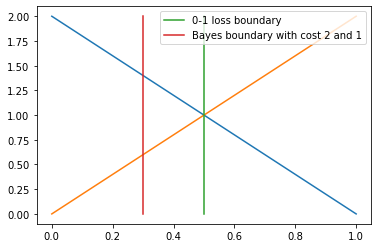

In [391]:
#Question 5
#https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
#Question 5 part B, C,D is in the report
#Decision regions is shown in doc file shared
import random as rd

data=np.linspace(0,1, 1000)
ClassDens1= 2 - (np.multiply(2 ,data))
ClassDens2=np.multiply(2, data)
plt.plot(data,ClassDens1)
plt.plot(data,ClassDens2)
decisionPoints=[]
Points=[]
for i in range(0, len(data)):
    classone=2- (2*data[i])
    classtwo= 2* data[i]
    if(data[i]<0.5):
        decisionPoints.append(data[i])
decisonRule=np.linspace(0,2, 1000)


decisionPoints=[0.5 for i in range(0, 1000)]
plt.plot(decisionPoints, decisonRule, label="0-1 loss boundary")
decisonRule1=np.linspace(0,2, 1000)
decisionPoints1=[0.3 for i in range(0, 1000)]
plt.plot(decisionPoints1, decisonRule1, label="Bayes boundary with cost 2 and 1")
plt.legend()

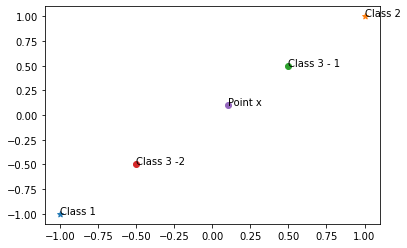

In [112]:
#Question-6 - Part A
plt.scatter(-1, -1, marker='*')
plt.annotate("Class 1", (-1,-1))
plt.scatter(1, 1, marker='*')
plt.annotate("Class 2", (1,1))
plt.scatter(0.5, 0.5)
plt.annotate("Class 3 - 1", (0.5, 0.5))
plt.scatter(-0.5, -0.5)
plt.annotate("Class 3 -2", (-0.5, -0.5))
plt.scatter(0.1, 0.1)
plt.annotate("Point x", (0.1, 0.1))
plt.show()

In [317]:
#Question 6 Part B
#Question 6 part B is in the report
import numpy as np

mu1=np.array([-1, -1])
sigma=np.array([[1, 0], [0, 1]])
mu2=np.array([1, 1])
mu31=np.array([0.5, 0.5])
mu32=np.array([-0.5, -0.5])
X=np.array([0.1, 0.1])
sigma_determinate=np.linalg.det(sigma)
sigma_inverse=np.linalg.inv(sigma)

part1=1/(np.sqrt((2 *np.pi)**2 * sigma_determinate))
part2=np.exp((-0.5)* np.transpose(X-mu31) * sigma_inverse * (X-mu31))


gaussian_1=multivariate_normal.pdf(X, mu1, sigma)
gaussian_2=multivariate_normal.pdf(X, mu2, sigma)
gaussian_3=(0.5 * multivariate_normal.pdf(X, mu31, sigma))+(0.5 * multivariate_normal.pdf(X, mu32, sigma))
print("Gaussian 1\t",gaussian_1)
print("\nGaussian 2\t",gaussian_2)
print("\nGaussian 3 (GMM)\t",gaussian_3)

Gaussian 1	 0.047459571037821745

Gaussian 2	 0.07080136021368282

Gaussian 3 (GMM)	 0.1233307661057135


In [382]:
#Question 8
#To calculate the eigen values, eigen vectors, Euclidean distance, Mahalanobis distance, determinate, covariance 
#I used numpy package and the formulae for the same is shown in the report. 

from scipy import stats
from scipy.spatial.distance import cdist
from scipy.spatial import distance
#Part -1
mean=np.array([[1,1,1]])
covariance=np.array([[1, 0, 0], [0, 5, 2], [0, 2, 5]])
X1=np.array([[0,0,0]])
X2=np.array([[5,5,5]])
determinate_matrix=np.linalg.det(covariance)
inverse_covariance=np.linalg.inv(covariance)
eigen_values, eigen_vectors=np.linalg.eig(covariance)

part1=(1./(np.power(2.*np.pi, 3/2) * np.sqrt(determinate_matrix)))
part2=np.exp(-0.5 * np.linalg.multi_dot([(X1.T - mean.T).T , inverse_covariance , (X1.T-mean.T)]))
gaussian1=part1 * part2

part11=(1./(np.power(2.*np.pi, 3/2) * np.sqrt(determinate_matrix)))
part22=np.exp(-0.5 * np.linalg.multi_dot([(X2.T - mean.T).T , inverse_covariance , (X2.T-mean.T)]))
gaussian2=part11 * part22
euclideanDistance=np.linalg.norm(mean-X2)
MahalanobisDistance=distance.mahalanobis(mean, X2, inverse_covariance)
print("\nDeterminant  of a Covariance matrix\n",determinate_matrix)
print("\nInverse of a Covariance matrix\n",inverse_covariance)
print("\nEigen values\n", eigen_values)
print("\nEigen vectors\n", eigen_vectors)
print("\nDensity at (0,0,0)`\n", gaussian1)
print("\nDensity at (5,5,5)`\n", gaussian2)
print("\nEuclidean Distance\n", euclideanDistance)
print("\nMahalanobisDistance\n", MahalanobisDistance)



Determinant  of a Covariance matrix
 21.0

Inverse of a Covariance matrix
 [[ 1.          0.          0.        ]
 [ 0.          0.23809524 -0.0952381 ]
 [ 0.         -0.0952381   0.23809524]]

Eigen values
 [7. 3. 1.]

Eigen vectors
 [[ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]]

Density at (0,0,0)`
 [[0.00728503]]

Density at (5,5,5)`
 [[4.72706521e-07]]

Euclidean Distance
 6.928203230275509

MahalanobisDistance
 4.535573676110727
